<a href="https://colab.research.google.com/github/disha2sinha/Reducing-Imbalanced-dataset-by-Under-sampling-approach-Consensus-Clustering/blob/main/Generating_CLustering_with_different_Clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In [1]:
import pandas as pd 
import io 
#colon_df = pd.read_csv(io.BytesIO(uploaded['colon.csv']),index_col=0)
colon_df = pd.read_csv("https://raw.githubusercontent.com/SohelRaja/Consensus-and-Ensemble-Model/main/Datasets/colon.csv",index_col=0)
colon_df.head()

H55933     R39465    R39465_  ...    R77780    T49647     Class
1  8589.4160  5468.2407  4263.4077  ...  83.52250  28.70125  Abnormal
2  9164.2540  6719.5293  4883.4487  ...  44.47250  16.77375    Normal
3  3825.7050  6970.3613  5369.9688  ...  16.09250  15.15625  Abnormal
4  6246.4487  7823.5340  5955.8350  ...  49.98250  16.08500    Normal
5  3230.3286  3694.4500  3400.7400  ...   7.48875  31.81250  Abnormal

[5 rows x 2001 columns]

In [2]:
colon_majority_df=colon_df[colon_df['Class']=='Abnormal']
colon_majority_df.shape

(40, 2001)

In [3]:
colon_minority_df=colon_df[colon_df['Class']=='Normal']
colon_minority_df.shape

(22, 2001)

In [4]:
colon_df['Class'].replace(to_replace=[['Abnormal'], ['Normal']],value=[0,1],inplace=True)
colon_df

H55933     R39465    R39465_  ...    R77780    T49647  Class
1   8589.4160  5468.2407  4263.4077  ...  83.52250  28.70125      0
2   9164.2540  6719.5293  4883.4487  ...  44.47250  16.77375      1
3   3825.7050  6970.3613  5369.9688  ...  16.09250  15.15625      0
4   6246.4487  7823.5340  5955.8350  ...  49.98250  16.08500      1
5   3230.3286  3694.4500  3400.7400  ...   7.48875  31.81250      0
..        ...        ...        ...  ...       ...       ...    ...
58  4972.1660  4173.9180  3668.5337  ...  13.96000  10.54750      0
59  9112.3720  6824.4863  5982.8460  ...  23.20250  32.16625      0
60  6730.6250  3472.1250  2559.4624  ...  93.09875   7.43250      1
61  6234.6226  4005.3000  3093.6750  ...  32.68750  23.26500      0
62  7472.0100  3653.9340  2728.2163  ...  49.86250  39.63125      1

[62 rows x 2001 columns]

In [5]:
colon_majority_df=colon_df[colon_df['Class']==0]
colon_majority_df.head()

H55933     R39465    R39465_  ...    R77780    T49647  Class
1  8589.4160  5468.2407  4263.4077  ...  83.52250  28.70125      0
3  3825.7050  6970.3613  5369.9688  ...  16.09250  15.15625      0
5  3230.3286  3694.4500  3400.7400  ...   7.48875  31.81250      0
7  7126.5986  3779.0680  3705.5537  ...  37.23625  24.44500      0
9  9330.6790  7017.2295  4723.7827  ...  40.39125  26.84750      0

[5 rows x 2001 columns]

In [6]:
colon_minority_df=colon_df[colon_df['Class']==1]
colon_minority_df.head()

H55933     R39465    R39465_  ...    R77780    T49647  Class
2   9164.2540  6719.5293  4883.4487  ...  44.47250  16.77375      1
4   6246.4487  7823.5340  5955.8350  ...  49.98250  16.08500      1
6   2510.3250  1960.6545  1566.3150  ...   9.81500  21.88375      1
8   4028.7100  3156.1592  2870.2550  ...  44.37625  52.29000      1
10  5271.5176  4740.7680  3318.5137  ...  65.61000  44.04250      1

[5 rows x 2001 columns]

In [7]:
colon_df.isnull().values.any()

False

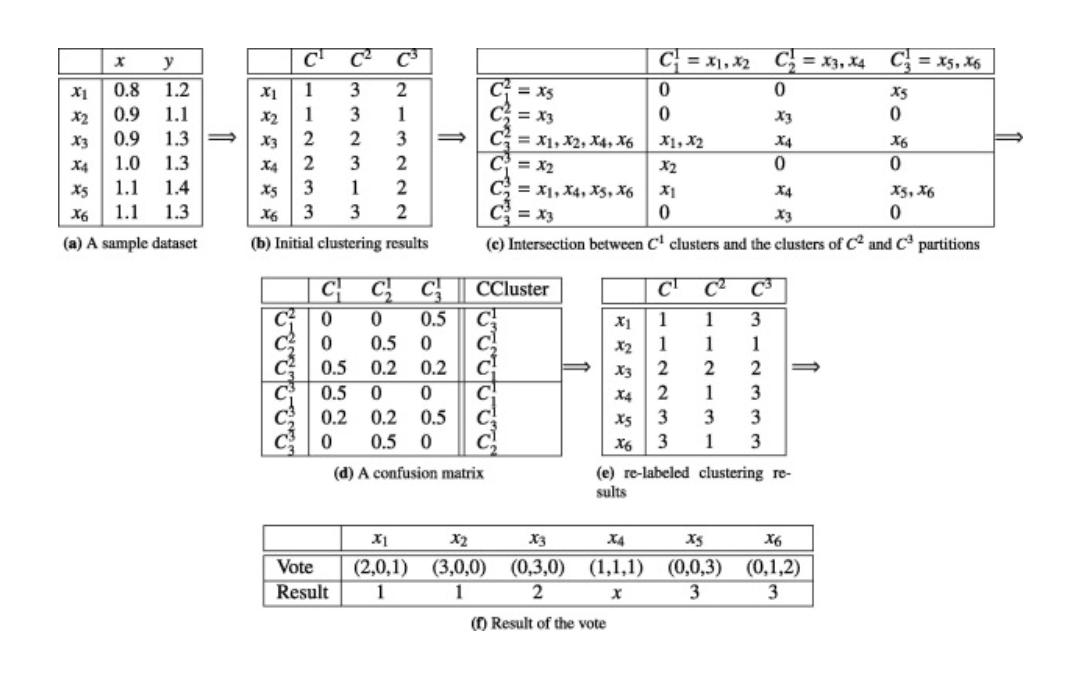

Text(0, 0.5, 'Frequency')

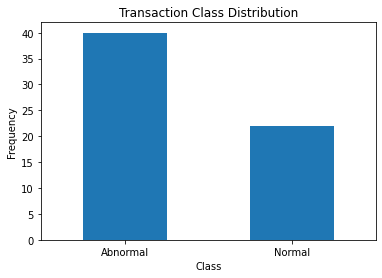

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns



count_classes = pd.value_counts(colon_df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
LABELS = ["Abnormal", "Normal"]
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
print(colon_minority_df.shape,colon_majority_df.shape)

(22, 2001) (40, 2001)


In [10]:
# majority=colon_majority_df['Class']
# colon_majority_df=colon_majority_df.drop('Class',axis=1)
# colon_majority_df.head()

# Different Clustering :

In [11]:
import pandas as pd
columns=['Kmeans','Kmeans++','Minibatch']
clustering_result=pd.DataFrame(columns=columns)

In [12]:
num_of_clusters=7

##**KMEANS CLUSTERING**

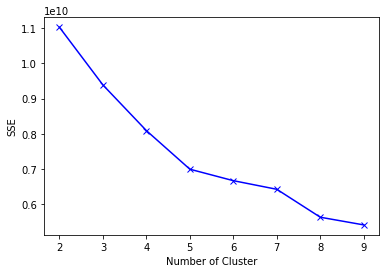

In [13]:
# Elbow method to find optimal K
from sklearn.cluster import KMeans

sse={}
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='random',max_iter=500).fit(colon_majority_df)
  sse[k]=kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.savefig("elbow_method.png")

In [14]:
#Kmeans:
kmeans=KMeans(n_clusters=num_of_clusters,init='random',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans']=kmeans.labels_

In [15]:
#import seaborn as sns
#sns.lmplot(x='Top10perc',y='S.F.Ratio',data = colon_majority_df,hue='labels',fit_reg=False)
#sns.pairplot(colon_majority_df[:0],hue='labels')

In [16]:
partition1 = colon_majority_df
partition1=partition1.reset_index(drop=True)
partition1['cluster_label'] = clustering_result['Kmeans']
partition1 #with cluster labels 

H55933      R39465    R39465_  ...     T49647  Class  cluster_label
0    8589.4160   5468.2407  4263.4077  ...   28.70125      0              6
1    3825.7050   6970.3613  5369.9688  ...   15.15625      0              4
2    3230.3286   3694.4500  3400.7400  ...   31.81250      0              6
3    7126.5986   3779.0680  3705.5537  ...   24.44500      0              6
4    9330.6790   7017.2295  4723.7827  ...   26.84750      0              0
5   14876.4070   3201.9045  2327.6262  ...   58.66375      0              5
6    4469.0900   5167.0566  4773.6800  ...   34.69250      0              6
7    4913.7990   5215.0480  4288.6160  ...   89.45375      0              1
8    7144.4062   2071.4023  1619.2762  ...   48.49250      0              6
9    5382.3940   3848.4430  3372.4888  ...   25.10500      0              6
10   7434.8213   6471.2114  5029.6177  ...   25.97250      0              1
11   4214.9000   2213.3567  1611.5188  ...   94.55000      0              0
12   8865.4590   5447.1865  4887.0576  ...   56.00000      0              0
13   5934.8887   3744.9885  3528.8337  ...   19.75000      0              6
14   5821.6177   3748.2478  3439.9539  ...   20.99375      0              6
15   9767.0270   9785.7750  8605.0440  ...   33.37500      0              2
16  13324.7290   9505.0340  7740.9873  ...   47.08250      0              2
17  12977.7120   7565.6157  5735.2000  ...   34.85750      0              2
18   8753.2390   8978.1340  7777.8413  ...  117.19625      0              2
19   5012.0200   1383.4886  1269.6487  ...   48.37500      0              6
20   6904.8013   2260.7773  1987.0012  ...   28.16875      0              6
21   8347.9830   9852.2980  8178.9650  ...   25.99500      0              1
22   5100.5360   3343.3206  2925.6700  ...   50.77625      0              6
23   4554.5760   3139.3113  2958.4026  ...   67.68625      0              6
24   5466.9300  10152.2730  7760.9175  ...    6.73125      0              1
25   4201.5073   2425.6272  2228.8174  ...   97.86750      0              6
26   9128.1190   5502.7160  4590.1340  ...   37.45125      0              1
27   3799.0889   5665.7793  5157.0674  ...    7.55375      0              6
28  14641.9310   3377.3933  3048.4326  ...   88.87125      0              5
29   9443.8780   6671.7773  6260.6160  ...   95.59625      0              2
30  14368.2760   3651.9910  3302.9275  ...  112.43250      0              3
31   6951.3540   5565.7773  4480.7850  ...   73.62000      0              3
32   6357.9214   3736.8455  2665.5913  ...   14.29000      0              6
33  11605.9720   8278.9180  7316.1040  ...   65.54500      0              5
34   7666.6750   6409.7390  6489.8640  ...   30.42000      0              1
35   4527.0040   2912.3070  2124.9888  ...   41.43625      0              6
36   4653.2373   6251.5566  4947.1226  ...   31.35000      0              4
37   4972.1660   4173.9180  3668.5337  ...   10.54750      0              6
38   9112.3720   6824.4863  5982.8460  ...   32.16625      0              0
39   6234.6226   4005.3000  3093.6750  ...   23.26500      0              6

[40 rows x 2002 columns]

# **CLUSTER VISUALIZATION USING PCA FOR REDUCING DIMENSIONS**

In [17]:
import plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame. The columns of the DataFrame produced from the PCA procedure are called Principal Components. We will use these principal components to help us visualize our clusters in 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions. For example, we can use two principal components to visualize the clusters in 2-D space, or three principal components to visualize the clusters in 3-D space.



In [18]:
from sklearn.decomposition import PCA #Principal Component Analysis

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(partition1.drop(["cluster_label"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(partition1.drop(["cluster_label"], axis=1)))

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


In [19]:
partition1_plot= pd.concat([partition1,PCs_2d,PCs_3d], axis=1, join='inner')

### **CLUSTER VISUALIZATION IN TWO DIMENSIONAL SPACE**

In [20]:
data=[]
for i in partition1_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition1_plot['cluster_label']==i]
  trace_i = go.Scatter(x = cluster_i["PC1_2d"],y = cluster_i["PC2_2d"],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)


### **CLUSTER VISUALIZATION IN THREE DIMENSIONAL SPACE**

In [21]:
data=[]
for i in partition1_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition1_plot['cluster_label']==i]
  trace_i = go.Scatter3d(x = cluster_i["PC1_3d"],y = cluster_i["PC2_3d"],z=cluster_i['PC3_3d'],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)


## **KMEANS++ CLUSTERING**

In [22]:
#Kmeans++:
kmeans=KMeans(n_clusters=num_of_clusters,init='k-means++',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans++']=kmeans.labels_

In [23]:
partition2 = colon_majority_df
partition2=partition2.reset_index(drop=True)
partition2['cluster_label'] = clustering_result['Kmeans++']
partition2 #with cluster labels 

H55933      R39465    R39465_  ...     T49647  Class  cluster_label
0    8589.4160   5468.2407  4263.4077  ...   28.70125      0              0
1    3825.7050   6970.3613  5369.9688  ...   15.15625      0              6
2    3230.3286   3694.4500  3400.7400  ...   31.81250      0              0
3    7126.5986   3779.0680  3705.5537  ...   24.44500      0              0
4    9330.6790   7017.2295  4723.7827  ...   26.84750      0              5
5   14876.4070   3201.9045  2327.6262  ...   58.66375      0              3
6    4469.0900   5167.0566  4773.6800  ...   34.69250      0              0
7    4913.7990   5215.0480  4288.6160  ...   89.45375      0              5
8    7144.4062   2071.4023  1619.2762  ...   48.49250      0              0
9    5382.3940   3848.4430  3372.4888  ...   25.10500      0              0
10   7434.8213   6471.2114  5029.6177  ...   25.97250      0              5
11   4214.9000   2213.3567  1611.5188  ...   94.55000      0              0
12   8865.4590   5447.1865  4887.0576  ...   56.00000      0              5
13   5934.8887   3744.9885  3528.8337  ...   19.75000      0              0
14   5821.6177   3748.2478  3439.9539  ...   20.99375      0              0
15   9767.0270   9785.7750  8605.0440  ...   33.37500      0              2
16  13324.7290   9505.0340  7740.9873  ...   47.08250      0              2
17  12977.7120   7565.6157  5735.2000  ...   34.85750      0              2
18   8753.2390   8978.1340  7777.8413  ...  117.19625      0              1
19   5012.0200   1383.4886  1269.6487  ...   48.37500      0              0
20   6904.8013   2260.7773  1987.0012  ...   28.16875      0              0
21   8347.9830   9852.2980  8178.9650  ...   25.99500      0              5
22   5100.5360   3343.3206  2925.6700  ...   50.77625      0              0
23   4554.5760   3139.3113  2958.4026  ...   67.68625      0              0
24   5466.9300  10152.2730  7760.9175  ...    6.73125      0              5
25   4201.5073   2425.6272  2228.8174  ...   97.86750      0              0
26   9128.1190   5502.7160  4590.1340  ...   37.45125      0              5
27   3799.0889   5665.7793  5157.0674  ...    7.55375      0              0
28  14641.9310   3377.3933  3048.4326  ...   88.87125      0              4
29   9443.8780   6671.7773  6260.6160  ...   95.59625      0              1
30  14368.2760   3651.9910  3302.9275  ...  112.43250      0              4
31   6951.3540   5565.7773  4480.7850  ...   73.62000      0              4
32   6357.9214   3736.8455  2665.5913  ...   14.29000      0              0
33  11605.9720   8278.9180  7316.1040  ...   65.54500      0              4
34   7666.6750   6409.7390  6489.8640  ...   30.42000      0              5
35   4527.0040   2912.3070  2124.9888  ...   41.43625      0              0
36   4653.2373   6251.5566  4947.1226  ...   31.35000      0              6
37   4972.1660   4173.9180  3668.5337  ...   10.54750      0              0
38   9112.3720   6824.4863  5982.8460  ...   32.16625      0              5
39   6234.6226   4005.3000  3093.6750  ...   23.26500      0              0

[40 rows x 2002 columns]

In [24]:
#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(partition2.drop(["cluster_label"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(partition2.drop(["cluster_label"], axis=1)))

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [25]:
partition2_plot= pd.concat([partition2,PCs_2d,PCs_3d], axis=1, join='inner')

In [26]:
data=[]
for i in partition2_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition1_plot['cluster_label']==i]
  trace_i = go.Scatter(x = cluster_i["PC1_2d"],y = cluster_i["PC2_2d"],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)


In [27]:
data=[]
for i in partition2_plot.cluster_label.unique():
  cluster_i=partition1_plot[partition2_plot['cluster_label']==i]
  trace_i = go.Scatter3d(x = cluster_i["PC1_3d"],y = cluster_i["PC2_3d"],z=cluster_i['PC3_3d'],mode = "markers",name = "Cluster "+str(i),text = None)
  data.append(trace_i)

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)

iplot(fig)

In [28]:
!pip install kmodes

In [29]:
from kmodes.kmodes import KModes


km = KModes(n_clusters=num_of_clusters, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(colon_majority_df)

df_0_centroids=km.cluster_centroids_
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 65991.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 65992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 65991.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 65992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 65992.0
Best run was number 1


array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 3,
       0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 1], dtype=uint16)

In [30]:
partition3 = colon_majority_df
partition3=partition3.reset_index(drop=True)
partition3['cluster_label'] = clusters
partition3 #with cluster labels 

H55933      R39465    R39465_  ...     T49647  Class  cluster_label
0    8589.4160   5468.2407  4263.4077  ...   28.70125      0              4
1    3825.7050   6970.3613  5369.9688  ...   15.15625      0              0
2    3230.3286   3694.4500  3400.7400  ...   31.81250      0              0
3    7126.5986   3779.0680  3705.5537  ...   24.44500      0              0
4    9330.6790   7017.2295  4723.7827  ...   26.84750      0              0
5   14876.4070   3201.9045  2327.6262  ...   58.66375      0              0
6    4469.0900   5167.0566  4773.6800  ...   34.69250      0              0
7    4913.7990   5215.0480  4288.6160  ...   89.45375      0              0
8    7144.4062   2071.4023  1619.2762  ...   48.49250      0              0
9    5382.3940   3848.4430  3372.4888  ...   25.10500      0              0
10   7434.8213   6471.2114  5029.6177  ...   25.97250      0              0
11   4214.9000   2213.3567  1611.5188  ...   94.55000      0              0
12   8865.4590   5447.1865  4887.0576  ...   56.00000      0              0
13   5934.8887   3744.9885  3528.8337  ...   19.75000      0              0
14   5821.6177   3748.2478  3439.9539  ...   20.99375      0              0
15   9767.0270   9785.7750  8605.0440  ...   33.37500      0              4
16  13324.7290   9505.0340  7740.9873  ...   47.08250      0              0
17  12977.7120   7565.6157  5735.2000  ...   34.85750      0              0
18   8753.2390   8978.1340  7777.8413  ...  117.19625      0              0
19   5012.0200   1383.4886  1269.6487  ...   48.37500      0              0
20   6904.8013   2260.7773  1987.0012  ...   28.16875      0              2
21   8347.9830   9852.2980  8178.9650  ...   25.99500      0              3
22   5100.5360   3343.3206  2925.6700  ...   50.77625      0              0
23   4554.5760   3139.3113  2958.4026  ...   67.68625      0              0
24   5466.9300  10152.2730  7760.9175  ...    6.73125      0              0
25   4201.5073   2425.6272  2228.8174  ...   97.86750      0              6
26   9128.1190   5502.7160  4590.1340  ...   37.45125      0              0
27   3799.0889   5665.7793  5157.0674  ...    7.55375      0              0
28  14641.9310   3377.3933  3048.4326  ...   88.87125      0              0
29   9443.8780   6671.7773  6260.6160  ...   95.59625      0              0
30  14368.2760   3651.9910  3302.9275  ...  112.43250      0              0
31   6951.3540   5565.7773  4480.7850  ...   73.62000      0              0
32   6357.9214   3736.8455  2665.5913  ...   14.29000      0              0
33  11605.9720   8278.9180  7316.1040  ...   65.54500      0              5
34   7666.6750   6409.7390  6489.8640  ...   30.42000      0              0
35   4527.0040   2912.3070  2124.9888  ...   41.43625      0              0
36   4653.2373   6251.5566  4947.1226  ...   31.35000      0              0
37   4972.1660   4173.9180  3668.5337  ...   10.54750      0              0
38   9112.3720   6824.4863  5982.8460  ...   32.16625      0              5
39   6234.6226   4005.3000  3093.6750  ...   23.26500      0              1

[40 rows x 2002 columns]

## **K-prototypes Clustering**

In [31]:
from kmodes.kprototypes import KPrototypes


kproto = KPrototypes(n_clusters=num_of_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(colon_majority_df, categorical=[2000])


# Print cluster centroids of the trained model.
clusters


Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5, ncost: 7085116926.676441
Run: 1, iteration: 2/100, moves: 4, ncost: 6781070347.457669
Run: 1, iteration: 3/100, moves: 1, ncost: 6754037768.587791
Run: 1, iteration: 4/100, moves: 0, ncost: 6754037768.587791
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing c

array([6, 5, 1, 6, 0, 2, 1, 1, 1, 1, 6, 1, 3, 6, 6, 4, 4, 2, 4, 1, 1, 3,
       6, 1, 6, 1, 6, 1, 2, 4, 0, 3, 6, 0, 6, 1, 5, 1, 3, 1], dtype=uint16)

In [32]:
partition4 = colon_majority_df
partition4=partition4.reset_index(drop=True)
partition4['cluster_label'] = clusters
partition4

H55933      R39465    R39465_  ...     T49647  Class  cluster_label
0    8589.4160   5468.2407  4263.4077  ...   28.70125      0              6
1    3825.7050   6970.3613  5369.9688  ...   15.15625      0              5
2    3230.3286   3694.4500  3400.7400  ...   31.81250      0              1
3    7126.5986   3779.0680  3705.5537  ...   24.44500      0              6
4    9330.6790   7017.2295  4723.7827  ...   26.84750      0              0
5   14876.4070   3201.9045  2327.6262  ...   58.66375      0              2
6    4469.0900   5167.0566  4773.6800  ...   34.69250      0              1
7    4913.7990   5215.0480  4288.6160  ...   89.45375      0              1
8    7144.4062   2071.4023  1619.2762  ...   48.49250      0              1
9    5382.3940   3848.4430  3372.4888  ...   25.10500      0              1
10   7434.8213   6471.2114  5029.6177  ...   25.97250      0              6
11   4214.9000   2213.3567  1611.5188  ...   94.55000      0              1
12   8865.4590   5447.1865  4887.0576  ...   56.00000      0              3
13   5934.8887   3744.9885  3528.8337  ...   19.75000      0              6
14   5821.6177   3748.2478  3439.9539  ...   20.99375      0              6
15   9767.0270   9785.7750  8605.0440  ...   33.37500      0              4
16  13324.7290   9505.0340  7740.9873  ...   47.08250      0              4
17  12977.7120   7565.6157  5735.2000  ...   34.85750      0              2
18   8753.2390   8978.1340  7777.8413  ...  117.19625      0              4
19   5012.0200   1383.4886  1269.6487  ...   48.37500      0              1
20   6904.8013   2260.7773  1987.0012  ...   28.16875      0              1
21   8347.9830   9852.2980  8178.9650  ...   25.99500      0              3
22   5100.5360   3343.3206  2925.6700  ...   50.77625      0              6
23   4554.5760   3139.3113  2958.4026  ...   67.68625      0              1
24   5466.9300  10152.2730  7760.9175  ...    6.73125      0              6
25   4201.5073   2425.6272  2228.8174  ...   97.86750      0              1
26   9128.1190   5502.7160  4590.1340  ...   37.45125      0              6
27   3799.0889   5665.7793  5157.0674  ...    7.55375      0              1
28  14641.9310   3377.3933  3048.4326  ...   88.87125      0              2
29   9443.8780   6671.7773  6260.6160  ...   95.59625      0              4
30  14368.2760   3651.9910  3302.9275  ...  112.43250      0              0
31   6951.3540   5565.7773  4480.7850  ...   73.62000      0              3
32   6357.9214   3736.8455  2665.5913  ...   14.29000      0              6
33  11605.9720   8278.9180  7316.1040  ...   65.54500      0              0
34   7666.6750   6409.7390  6489.8640  ...   30.42000      0              6
35   4527.0040   2912.3070  2124.9888  ...   41.43625      0              1
36   4653.2373   6251.5566  4947.1226  ...   31.35000      0              5
37   4972.1660   4173.9180  3668.5337  ...   10.54750      0              1
38   9112.3720   6824.4863  5982.8460  ...   32.16625      0              3
39   6234.6226   4005.3000  3093.6750  ...   23.26500      0              1

[40 rows x 2002 columns]

## **MINIBATCH KMEANS CLUSTERING**

In [33]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=num_of_clusters, batch_size=40, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(colon_majority_df)
clustering_result['Minibatch']=mbk.labels_

In [34]:
clustering_result['Minibatch'].values

array([5, 3, 5, 5, 1, 6, 5, 1, 5, 5, 1, 5, 1, 5, 5, 1, 0, 0, 2, 5, 5, 1,
       5, 5, 1, 5, 1, 5, 6, 0, 4, 4, 5, 4, 1, 5, 3, 5, 1, 5], dtype=int32)

In [35]:
partition5 = colon_majority_df
partition5=partition5.reset_index(drop=True)
partition5['cluster_label'] = clustering_result['Minibatch']
partition5

H55933      R39465    R39465_  ...     T49647  Class  cluster_label
0    8589.4160   5468.2407  4263.4077  ...   28.70125      0              5
1    3825.7050   6970.3613  5369.9688  ...   15.15625      0              3
2    3230.3286   3694.4500  3400.7400  ...   31.81250      0              5
3    7126.5986   3779.0680  3705.5537  ...   24.44500      0              5
4    9330.6790   7017.2295  4723.7827  ...   26.84750      0              1
5   14876.4070   3201.9045  2327.6262  ...   58.66375      0              6
6    4469.0900   5167.0566  4773.6800  ...   34.69250      0              5
7    4913.7990   5215.0480  4288.6160  ...   89.45375      0              1
8    7144.4062   2071.4023  1619.2762  ...   48.49250      0              5
9    5382.3940   3848.4430  3372.4888  ...   25.10500      0              5
10   7434.8213   6471.2114  5029.6177  ...   25.97250      0              1
11   4214.9000   2213.3567  1611.5188  ...   94.55000      0              5
12   8865.4590   5447.1865  4887.0576  ...   56.00000      0              1
13   5934.8887   3744.9885  3528.8337  ...   19.75000      0              5
14   5821.6177   3748.2478  3439.9539  ...   20.99375      0              5
15   9767.0270   9785.7750  8605.0440  ...   33.37500      0              1
16  13324.7290   9505.0340  7740.9873  ...   47.08250      0              0
17  12977.7120   7565.6157  5735.2000  ...   34.85750      0              0
18   8753.2390   8978.1340  7777.8413  ...  117.19625      0              2
19   5012.0200   1383.4886  1269.6487  ...   48.37500      0              5
20   6904.8013   2260.7773  1987.0012  ...   28.16875      0              5
21   8347.9830   9852.2980  8178.9650  ...   25.99500      0              1
22   5100.5360   3343.3206  2925.6700  ...   50.77625      0              5
23   4554.5760   3139.3113  2958.4026  ...   67.68625      0              5
24   5466.9300  10152.2730  7760.9175  ...    6.73125      0              1
25   4201.5073   2425.6272  2228.8174  ...   97.86750      0              5
26   9128.1190   5502.7160  4590.1340  ...   37.45125      0              1
27   3799.0889   5665.7793  5157.0674  ...    7.55375      0              5
28  14641.9310   3377.3933  3048.4326  ...   88.87125      0              6
29   9443.8780   6671.7773  6260.6160  ...   95.59625      0              0
30  14368.2760   3651.9910  3302.9275  ...  112.43250      0              4
31   6951.3540   5565.7773  4480.7850  ...   73.62000      0              4
32   6357.9214   3736.8455  2665.5913  ...   14.29000      0              5
33  11605.9720   8278.9180  7316.1040  ...   65.54500      0              4
34   7666.6750   6409.7390  6489.8640  ...   30.42000      0              1
35   4527.0040   2912.3070  2124.9888  ...   41.43625      0              5
36   4653.2373   6251.5566  4947.1226  ...   31.35000      0              3
37   4972.1660   4173.9180  3668.5337  ...   10.54750      0              5
38   9112.3720   6824.4863  5982.8460  ...   32.16625      0              1
39   6234.6226   4005.3000  3093.6750  ...   23.26500      0              5

[40 rows x 2002 columns]

## **Fuzzy K-Means Clustering**

In [36]:
!pip install fuzzy-c-means
import numpy as np
from fcmeans import FCM


In [37]:
fcm = FCM(n_clusters=num_of_clusters)
fcm.fit(colon_majority_df.values)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(colon_majority_df.values)
fcm_labels

DeviceArray([0, 0, 5, 0, 3, 4, 1, 3, 1, 0, 3, 0, 3, 0, 0, 6, 2, 2, 2, 0,
             1, 6, 0, 0, 3, 0, 3, 0, 4, 2, 4, 4, 0, 4, 3, 0, 3, 0, 6, 0],            dtype=int32)

In [38]:
partition6 = colon_majority_df
partition6=partition6.reset_index(drop=True)
partition6['cluster_label'] = fcm_labels
partition6

H55933      R39465    R39465_  ...     T49647  Class  cluster_label
0    8589.4160   5468.2407  4263.4077  ...   28.70125      0              0
1    3825.7050   6970.3613  5369.9688  ...   15.15625      0              0
2    3230.3286   3694.4500  3400.7400  ...   31.81250      0              5
3    7126.5986   3779.0680  3705.5537  ...   24.44500      0              0
4    9330.6790   7017.2295  4723.7827  ...   26.84750      0              3
5   14876.4070   3201.9045  2327.6262  ...   58.66375      0              4
6    4469.0900   5167.0566  4773.6800  ...   34.69250      0              1
7    4913.7990   5215.0480  4288.6160  ...   89.45375      0              3
8    7144.4062   2071.4023  1619.2762  ...   48.49250      0              1
9    5382.3940   3848.4430  3372.4888  ...   25.10500      0              0
10   7434.8213   6471.2114  5029.6177  ...   25.97250      0              3
11   4214.9000   2213.3567  1611.5188  ...   94.55000      0              0
12   8865.4590   5447.1865  4887.0576  ...   56.00000      0              3
13   5934.8887   3744.9885  3528.8337  ...   19.75000      0              0
14   5821.6177   3748.2478  3439.9539  ...   20.99375      0              0
15   9767.0270   9785.7750  8605.0440  ...   33.37500      0              6
16  13324.7290   9505.0340  7740.9873  ...   47.08250      0              2
17  12977.7120   7565.6157  5735.2000  ...   34.85750      0              2
18   8753.2390   8978.1340  7777.8413  ...  117.19625      0              2
19   5012.0200   1383.4886  1269.6487  ...   48.37500      0              0
20   6904.8013   2260.7773  1987.0012  ...   28.16875      0              1
21   8347.9830   9852.2980  8178.9650  ...   25.99500      0              6
22   5100.5360   3343.3206  2925.6700  ...   50.77625      0              0
23   4554.5760   3139.3113  2958.4026  ...   67.68625      0              0
24   5466.9300  10152.2730  7760.9175  ...    6.73125      0              3
25   4201.5073   2425.6272  2228.8174  ...   97.86750      0              0
26   9128.1190   5502.7160  4590.1340  ...   37.45125      0              3
27   3799.0889   5665.7793  5157.0674  ...    7.55375      0              0
28  14641.9310   3377.3933  3048.4326  ...   88.87125      0              4
29   9443.8780   6671.7773  6260.6160  ...   95.59625      0              2
30  14368.2760   3651.9910  3302.9275  ...  112.43250      0              4
31   6951.3540   5565.7773  4480.7850  ...   73.62000      0              4
32   6357.9214   3736.8455  2665.5913  ...   14.29000      0              0
33  11605.9720   8278.9180  7316.1040  ...   65.54500      0              4
34   7666.6750   6409.7390  6489.8640  ...   30.42000      0              3
35   4527.0040   2912.3070  2124.9888  ...   41.43625      0              0
36   4653.2373   6251.5566  4947.1226  ...   31.35000      0              3
37   4972.1660   4173.9180  3668.5337  ...   10.54750      0              0
38   9112.3720   6824.4863  5982.8460  ...   32.16625      0              6
39   6234.6226   4005.3000  3093.6750  ...   23.26500      0              0

[40 rows x 2002 columns]

In [39]:
partition1, partition2, partition3, partition4,partition5,partition6

(        H55933      R39465    R39465_  ...     T49647  Class  cluster_label
 0    8589.4160   5468.2407  4263.4077  ...   28.70125      0              6
 1    3825.7050   6970.3613  5369.9688  ...   15.15625      0              4
 2    3230.3286   3694.4500  3400.7400  ...   31.81250      0              6
 3    7126.5986   3779.0680  3705.5537  ...   24.44500      0              6
 4    9330.6790   7017.2295  4723.7827  ...   26.84750      0              0
 5   14876.4070   3201.9045  2327.6262  ...   58.66375      0              5
 6    4469.0900   5167.0566  4773.6800  ...   34.69250      0              6
 7    4913.7990   5215.0480  4288.6160  ...   89.45375      0              1
 8    7144.4062   2071.4023  1619.2762  ...   48.49250      0              6
 9    5382.3940   3848.4430  3372.4888  ...   25.10500      0              6
 10   7434.8213   6471.2114  5029.6177  ...   25.97250      0              1
 11   4214.9000   2213.3567  1611.5188  ...   94.55000      0              0

In [40]:
c = 0
for i in range(len(partition1.cluster_label)):
  print(partition1.cluster_label[i], partition2.cluster_label[i], partition3.cluster_label[i],partition4.cluster_label[i],partition5.cluster_label[i],partition6.cluster_label[i])
  #if partition1.cluster_label[i]==partition2.cluster_label[i]:
    #c+=1

6 0 4 6 5 0
4 6 0 5 3 0
6 0 0 1 5 5
6 0 0 6 5 0
0 5 0 0 1 3
5 3 0 2 6 4
6 0 0 1 5 1
1 5 0 1 1 3
6 0 0 1 5 1
6 0 0 1 5 0
1 5 0 6 1 3
0 0 0 1 5 0
0 5 0 3 1 3
6 0 0 6 5 0
6 0 0 6 5 0
2 2 4 4 1 6
2 2 0 4 0 2
2 2 0 2 0 2
2 1 0 4 2 2
6 0 0 1 5 0
6 0 2 1 5 1
1 5 3 3 1 6
6 0 0 6 5 0
6 0 0 1 5 0
1 5 0 6 1 3
6 0 6 1 5 0
1 5 0 6 1 3
6 0 0 1 5 0
5 4 0 2 6 4
2 1 0 4 0 2
3 4 0 0 4 4
3 4 0 3 4 4
6 0 0 6 5 0
5 4 5 0 4 4
1 5 0 6 1 3
6 0 0 1 5 0
4 6 0 5 3 3
6 0 0 1 5 0
0 5 5 3 1 6
6 0 1 1 5 0


## **Finding the 3 Best algorithms for our model:**

In [41]:
from sklearn.metrics import davies_bouldin_score
print("Kmeans (partition 1): ",davies_bouldin_score(colon_majority_df, partition1.cluster_label))
print("Kmeans++ (partition 2): ",davies_bouldin_score(colon_majority_df, partition2.cluster_label))
print("KModes (partition 3): ",davies_bouldin_score(colon_majority_df, partition3.cluster_label))
print("K-prototypes(partition 4): ",davies_bouldin_score(colon_majority_df, partition4.cluster_label))
print("Minibatch Kmeans (partition 5): ",davies_bouldin_score(colon_majority_df, partition5.cluster_label))
print("Fuzzy K-means(partition 6): ",davies_bouldin_score(colon_majority_df, partition6.cluster_label))

Kmeans (partition 1):  1.7105150168977779
Kmeans++ (partition 2):  1.2482312965554458
KModes (partition 3):  1.7831360851480784
K-prototypes(partition 4):  1.78783612120693
Minibatch Kmeans (partition 5):  1.1967771830323513
Fuzzy K-means(partition 6):  1.976439235675303


In [42]:
partitionA, partitionB, partitionC = partition1, partition2, partition4

In [43]:
partitionA, partitionB, partitionC = partition1, partition2, partition4
colon_majority = colon_majority_df
colon_majority['C1'] = partitionA.cluster_label.values
colon_majority['C2'] = partitionB.cluster_label.values
colon_majority['C3'] = partitionC.cluster_label.values
colon_majority

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

H55933      R39465    R39465_      R85482  ...  Class  C1  C2  C3
1    8589.4160   5468.2407  4263.4077   4064.9358  ...      0   6   0   6
3    3825.7050   6970.3613  5369.9688   4705.6500  ...      0   4   6   5
5    3230.3286   3694.4500  3400.7400   3463.5857  ...      0   6   0   1
7    7126.5986   3779.0680  3705.5537   6594.5140  ...      0   6   0   6
9    9330.6790   7017.2295  4723.7827   9491.5340  ...      0   0   5   0
11  14876.4070   3201.9045  2327.6262  11248.6800  ...      0   5   3   2
13   4469.0900   5167.0566  4773.6800   3330.3643  ...      0   6   0   1
15   4913.7990   5215.0480  4288.6160   3213.4304  ...      0   1   5   1
17   7144.4062   2071.4023  1619.2762   2576.1590  ...      0   6   0   1
19   5382.3940   3848.4430  3372.4888   4444.5660  ...      0   6   0   1
21   7434.8213   6471.2114  5029.6177   4749.3286  ...      0   1   5   6
23   4214.9000   2213.3567  1611.5188   1764.2320  ...      0   0   0   1
25   8865.4590   5447.1865  4887.0576   3782.5945  ...      0   0   5   3
26   5934.8887   3744.9885  3528.8337   2721.7036  ...      0   6   0   6
27   5821.6177   3748.2478  3439.9539   2502.9660  ...      0   6   0   6
28   9767.0270   9785.7750  8605.0440   4941.2393  ...      0   2   2   4
29  13324.7290   9505.0340  7740.9873   7982.8105  ...      0   2   2   4
30  12977.7120   7565.6157  5735.2000   6911.6800  ...      0   2   2   2
31   8753.2390   8978.1340  7777.8413   6202.4966  ...      0   2   1   4
32   5012.0200   1383.4886  1269.6487   3168.7124  ...      0   6   0   1
33   6904.8013   2260.7773  1987.0012   3439.4106  ...      0   6   0   1
34   8347.9830   9852.2980  8178.9650   4467.5020  ...      0   1   5   3
35   5100.5360   3343.3206  2925.6700   2914.1946  ...      0   6   0   6
36   4554.5760   3139.3113  2958.4026   1658.3071  ...      0   6   0   1
37   5466.9300  10152.2730  7760.9175   7258.2500  ...      0   1   5   6
38   4201.5073   2425.6272  2228.8174   1503.6053  ...      0   6   0   1
40   9128.1190   5502.7160  4590.1340   3234.4019  ...      0   1   5   6
41   3799.0889   5665.7793  5157.0674   1359.7911  ...      0   6   0   1
44  14641.9310   3377.3933  3048.4326   5401.2266  ...      0   5   4   2
45   9443.8780   6671.7773  6260.6160   4905.7090  ...      0   2   1   4
46  14368.2760   3651.9910  3302.9275   5738.4860  ...      0   3   4   0
47   6951.3540   5565.7773  4480.7850   3667.6465  ...      0   3   4   3
49   6357.9214   3736.8455  2665.5913   2493.8750  ...      0   6   0   6
52  11605.9720   8278.9180  7316.1040   3602.3518  ...      0   5   4   0
53   7666.6750   6409.7390  6489.8640   2451.1180  ...      0   1   5   6
56   4527.0040   2912.3070  2124.9888   2609.0500  ...      0   6   0   1
57   4653.2373   6251.5566  4947.1226   3763.5464  ...      0   4   6   5
58   4972.1660   4173.9180  3668.5337   1567.5554  ...      0   6   0   1
59   9112.3720   6824.4863  5982.8460   3147.0430  ...      0   0   5   3
61   6234.6226   4005.3000  3093.6750   3183.0857  ...      0   6   0   1

[40 rows x 2004 columns]

In [44]:
#colon_majority.to_csv('colon_majority.csv', index = False)
#from google.colab import files
#files.download("colon_majority.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>